In [12]:
import pykrx.stock as stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samsung = stock.get_market_ohlcv_by_date('20001226','20191231','005380')#'005930')

In [2]:
samsung['Mkt-Rf'] = betaData['Mkt-Rf']

NameError: name 'betaData' is not defined

In [3]:
samsung

,시가,고가,저가,종가,거래량
날짜,,,,,
2000-12-26,3230,3240,3160,3160,1208632
2001-01-02,3160,3380,3140,3350,789127
2001-01-03,3229,3420,3220,3370,757143
2001-01-04,3790,3870,3660,3780,2398248
2001-01-05,3760,3920,3700,3900,1562744
...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252
2019-12-24,55600,55700,54800,55000,11868463
2019-12-26,54700,55400,54400,55400,9645034


In [13]:
samsungRet = samsung[['종가']]

for i in range(1, samsung.shape[0]):
    samsungRet['종가'].iloc[i] = (samsung['종가'].iloc[i] - samsung['종가'].iloc[i-1])/samsung['종가'].iloc[i-1]


C:\Users\kimyc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
samsungRet = samsungRet.iloc[1:]

In [15]:
betaData = pd.read_csv('ff3_kse.csv', index_col=0)
ttt = betaData.loc['2001-01-02':'2019-12-30']
ttt

,Mkt-Rf,SMB,HML
2001-01-02,0.032197,0.036234,-0.020940
2001-01-03,0.000697,0.027302,-0.004080
2001-01-04,0.069996,-0.016072,-0.010396
2001-01-05,0.040695,-0.047044,0.030786
2001-01-08,0.009795,0.015020,0.002680
...,...,...,...
2019-12-23,-0.000251,-0.009486,-0.000702
2019-12-24,-0.006251,-0.004369,0.010865
2019-12-26,0.003548,0.006016,0.005495
2019-12-27,0.002848,0.003531,-0.016558


In [16]:
samsungRet['Mkt-Rf'] = ttt['Mkt-Rf']
samsungRet

,종가,Mkt-Rf
날짜,,
2001-01-02,-0.033058,0.032197
2001-01-03,0.017094,0.000697
2001-01-04,0.071429,0.069996
2001-01-05,0.070588,0.040695
2001-01-08,0.036630,0.009795
...,...,...
2019-12-23,-0.012097,-0.000251
2019-12-24,-0.004082,-0.006251
2019-12-26,0.004098,0.003548


In [8]:
b_init = 0
w_init = 0

def hypothesis(b,w, data):
    return b + w * data['Mkt-Rf']

def predict(b, w, model, data):
    prediction = model(b,w,data)
    label = data['종가']
    loss = prediction - label
    
    return np.sum(loss**2)

In [9]:
predict(b_init, w_init, hypothesis, samsungRet)

2.0352416368234207

In [10]:
def partial(b,w, model, data):
    h = 0.0000001
    gradient_b = (predict(b_init+h, w_init, hypothesis, samsungRet) - predict(b_init, w_init, hypothesis, samsungRet)) / h
    gradient_w = (predict(b_init, w_init+h, hypothesis, samsungRet) - predict(b_init, w_init, hypothesis, samsungRet)) / h
    return gradient_b, gradient_w

    

In [11]:
partial(b_init, w_init, hypothesis, samsungRet)

(-7.771404382239666, -1.9954598773352927)

In [16]:
lr = 0.0001
print(f"initial value b:{b_init}, w:{w_init}")
for i in range(10000):
    gb, gw = partial(b_init, w_init, hypothesis, samsungRet)
    b_init = b_init - lr * gb
    w_init = w_init - lr * gw
    if i %1000 == 0 :
        print(f"{i} ____ b:{b_init}, w:{w_init}")
print(b_init, w_init)

initial value b:0.0004934298635017598, w:1.146616051884397
0 ____ b:0.0004934298551750871, w:1.1466160800384317
100 ____ b:0.0004934290416036546, w:1.1466188708613378
200 ____ b:0.0004934282421320546, w:1.1466216135928242
300 ____ b:0.0004934274562051755, w:1.1466243090613393
400 ____ b:0.0004934266840450618, w:1.1466269580810096
500 ____ b:0.0004934259250966022, w:1.1466295614518618
600 ____ b:0.000493425179137752, w:1.1466321199623764
700 ____ b:0.0004934244463905557, w:1.1466346343834921
800 ____ b:0.000493423725966835, w:1.146637105476045
900 ____ b:0.0004934230179776122, w:1.1466395339865487
1000 ____ b:0.0004934223220898204, w:1.146641920649194
1100 ____ b:0.0004934216384144818, w:1.1466442661850706
1200 ____ b:0.0004934209665075073, w:1.1466465712988372
1300 ____ b:0.00049342030603583, w:1.1466488366932648
1400 ____ b:0.0004934196571104721, w:1.1466510630499194
1500 ____ b:0.0004934190191763221, w:1.1466532510421512
1600 ____ b:0.0004934183923444024, w:1.1466554013289887
1700 __

In [37]:
partial(b_init, w_init, hypothesis, samsungRet)

(1.3322676295501878e-08, -4.950262422198648e-05)

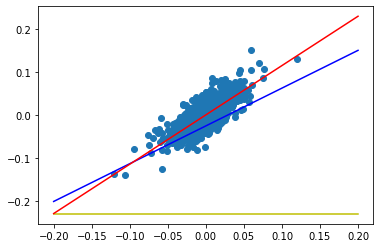

In [35]:
plt.figure()
plt.scatter(samsungRet['Mkt-Rf'], samsungRet['종가'])
plt.plot([-0.2, 0.2], [-0.2, 0.15] , c='blue')
plt.plot([-0.2, 0.2], [-0.2 * w_init + b_init, -0.2 * w_init + b_init], c='y')
plt.plot([-0.2, 0.2], [-0.228,0.229], c='red')

In [36]:
[-0.2 * w_init + b_init, -0.2 * w_init + b_init]

[-0.22885651967333054, -0.22885651967333054]

In [23]:
-0.2 * w_init + b_init

-0.22885651967333054

In [24]:
0.2* w_init + b_init

0.22984330156437416

In [27]:
b_init

-9521450595.163969

In [9]:
kospi = stock.get_market_ohlcv_by_date('20001226','20191231', 'kospi')
kospiRet = kospi[['종가']]/100

for i in range(1, kospi.shape[0]):
    kospiRet['종가'].iloc[i] = (kospi['종가'].iloc[i] - kospi['종가'].iloc[i-1])/kospi['종가'].iloc[i-1]


In [10]:
kospiRet = kospiRet[1:]
kospiRet

,종가
날짜,
2001-01-02,0.032361
2001-01-03,0.000921
2001-01-04,0.070172
2001-01-05,0.040913
2001-01-08,0.009985
...,...
2019-12-23,-0.000213
2019-12-24,-0.006185
2019-12-26,0.003584


In [22]:
np.corrcoef(samsungRet['종가'], kospiRet['종가'])

array([[1.        , 0.60995946],
       [0.60995946, 1.        ]])